In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter
import random

In [2]:
def get_image_with_facepoints(img_num):
    data_path = f'data/lfpw/trainset/image_{img_num:04d}'
    img_path = data_path + '.png'
    points_path = data_path + '.pts'
    face_points = []
    with open(points_path, 'r') as f:
        lines = f.readlines()
        for n, line in enumerate(lines):
            if 2 < n < 71:
                data = line.strip().split()
                face_points.append((float(data[0]), float(data[1])))

    original_image = Image.open(img_path)
    return original_image, face_points

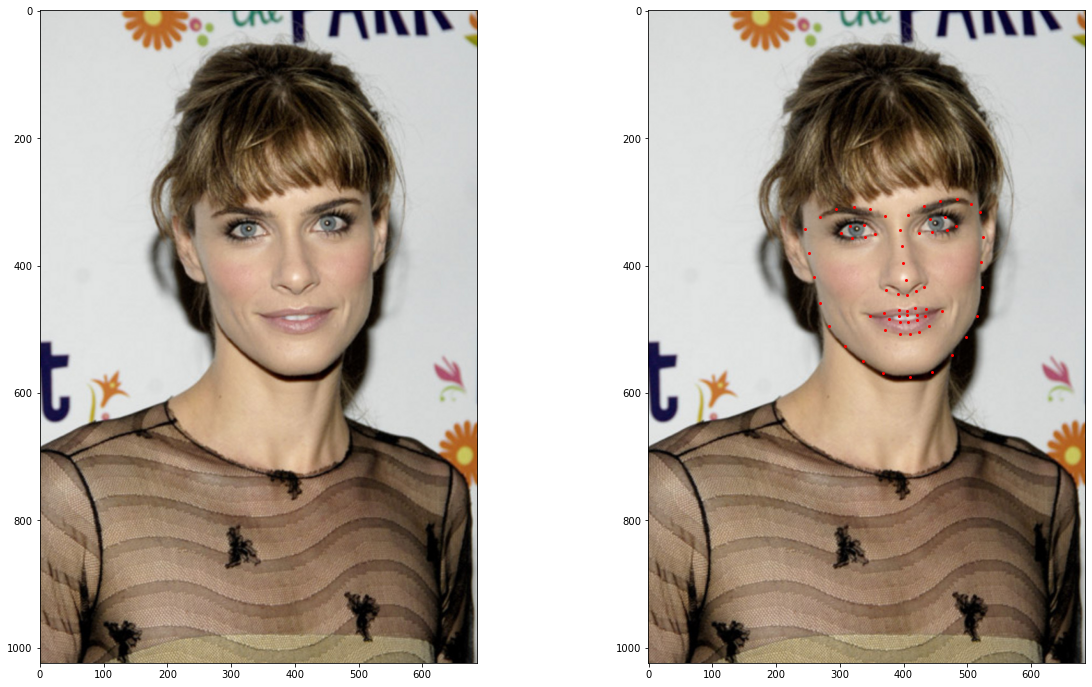

In [3]:
image, face_points = get_image_with_facepoints(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))
axes[0].imshow(image)
axes[1].imshow(image)
for point in face_points:
    axes[1].scatter(point[0], point[1], s=4, color='red')

In [7]:
# Mask keypoints parameters
# Percentage of masks that will cover chin
mask_chin_threshold = 0.7

# Percentage of masks that will cover nose
mask_nose_threshold = 0.6

def get_mask_keypoints(face_keypoints):
    keypoints = face_keypoints[1:16]
    keypoints.append(face_keypoints[30])
    return keypoints

def get_face_with_mask(image, face_keypoints):
    mask_pattern = Image.new('RGBA', image.size, (225, 25, 45, 0))
    mask = Image.new('RGBA', image.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(mask)
    draw.polygon(get_mask_keypoints(face_keypoints), fill=(255, 255, 0))
    mask = mask.filter(ImageFilter.GaussianBlur(radius=2))
    return Image.composite(mask_pattern, image, mask)

Number 516


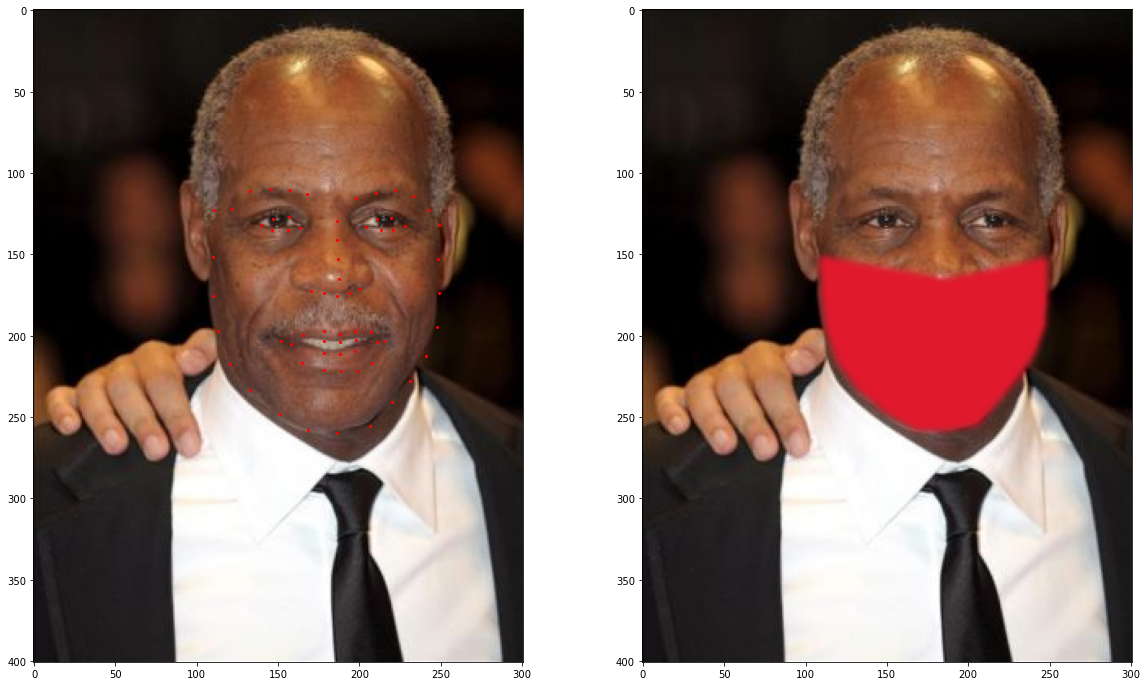

In [8]:
num = random.randint(1, 872)
image, face_points = get_image_with_facepoints(num)
print(f'Number {num}')
fig, axes = plt.subplots(1, 2, figsize=(20, 12))
axes[0].imshow(image)
for point in face_points:
    axes[0].scatter(point[0], point[1], s=4, color='red')
axes[1].imshow(get_face_with_mask(image, face_points))


In [9]:
import copy
import importlib
import utils.mask_utils
importlib.reload(utils.mask_utils)


<module 'utils.mask_utils' from '/home/strv/Projects/mask2face/utils/mask_utils.py'>

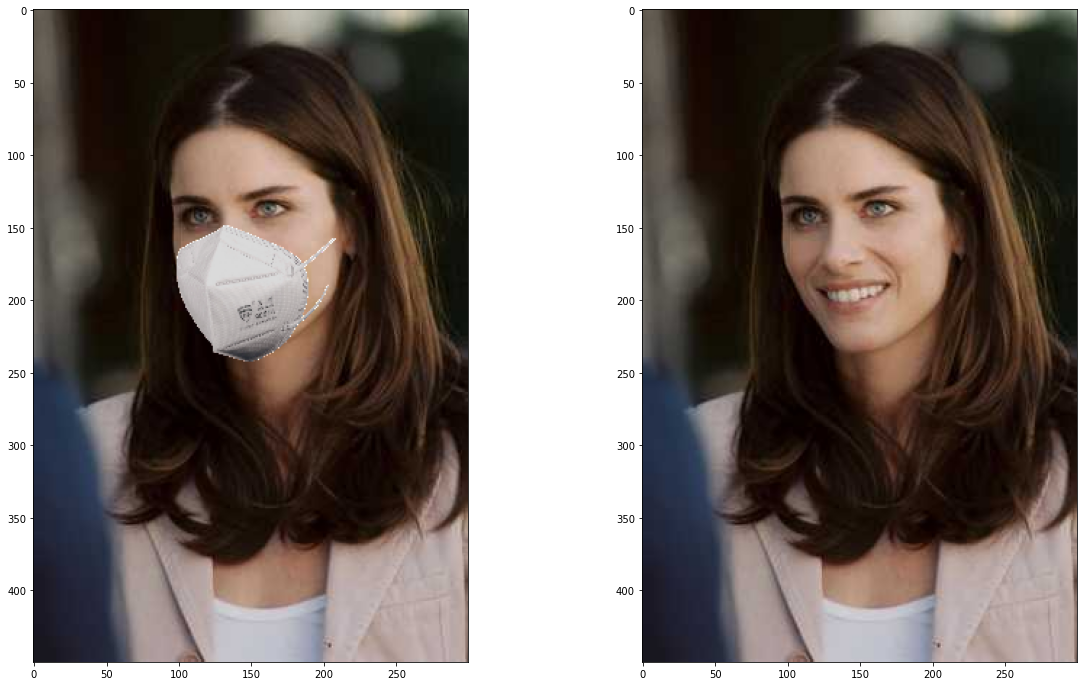

In [15]:
import numpy as np
class Arguments:
    def __init__(self):
        self.mask_type = 'random' # ["surgical", "N95", "KN95", "cloth", "gas", "inpaint", "random", "all"]
        self.verbose = False #??
        self.code = '' # default="cloth-masks/textures/check/check_4.jpg, cloth-#e54294, cloth-#ff0000, cloth, cloth-masks/textures/others/heart_1.png, cloth-masks/textures/fruits/pineapple.png, N95, surgical_blue, surgical_green"
        self.code_count = np.zeros(0) # np.zeros(len("".join(args.code.split()).split(",")))
        self.mask_dict_of_dict = {}
        self.color = '' # string with hex color like #000000
        self.pattern = '' # path to file with pattern
        self.pattern_weight = 0.5 # number from 0 to 1
        self.color_weight = 0.5 # number from 0 to 1
        self.path = 'data/lfpw/trainset/image_0005.png'# path to image that should be masked

num = random.randint(1, 872)
args = Arguments()
image, face_points = get_image_with_facepoints(36)
masked_image = utils.mask_utils.mask_image(copy.deepcopy(image), face_points, args)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))
axes[0].imshow(masked_image)
axes[1].imshow(image)


